In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



dimension de X: (100, 2)
dimension de Y: (100, 1)


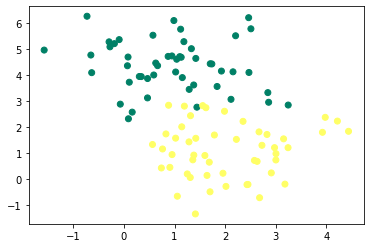

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y=y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de Y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()


Fonction d'initialisation

In [3]:
def initialisation(X):
    W=np.random.randn(X.shape[1], 1)
    b=np.random.randn(1)
    return(W,b)



Modèle

In [4]:
def model(X, W,b):
    Z=X.dot(W) + b
    A=1/(1+np.exp(-Z))
    return A


In [5]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))
    

In [6]:
def gradients(A, X, y):
    dW =1/len(y) * np.dot(X.T, A-y)
    db=1/len(y) * np.sum(A-y)
    return (dW, db)
    

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)


In [8]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialiser W, b
    W, b = initialisation(X)
    Loss=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.plot(Loss)
    plt.show()
    return (W, b)


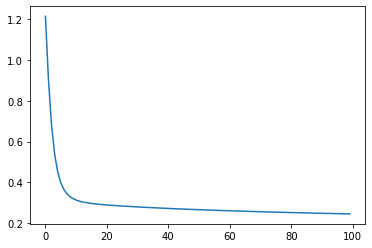

In [9]:
W, b =artificial_neuron(X, y)

In [10]:

def predict (X, W, b):
    A=model(X, W, b)
    return A>=0.5


In [11]:
from sklearn.metrics import accuracy_score
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialiser W, b
    W, b = initialisation(X)
    Loss=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred= predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(Loss)
    plt.show()
    return (W, b)


0.89


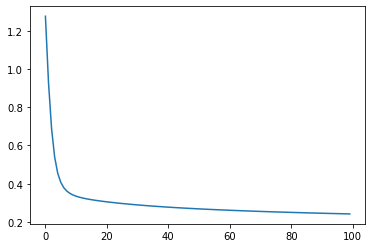

In [12]:
W, b =artificial_neuron(X, y)